In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
x= df[["Age", "Tenure", "Balance","EstimatedSalary"]]

In [7]:
y= df["Exited"]

In [8]:
from sklearn.preprocessing import StandardScaler;


In [9]:
st= StandardScaler()

In [10]:
x= st.fit_transform(x);

In [11]:
x

array([[ 0.29351742, -1.04175968, -1.22584767,  0.02188649],
       [ 0.19816383, -1.38753759,  0.11735002,  0.21653375],
       [ 0.29351742,  1.03290776,  1.33305335,  0.2406869 ],
       ...,
       [-0.27860412,  0.68712986, -1.22584767, -1.00864308],
       [ 0.29351742, -0.69598177, -0.02260751, -0.12523071],
       [-1.04143285, -0.35020386,  0.85996499, -1.07636976]])

In [12]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

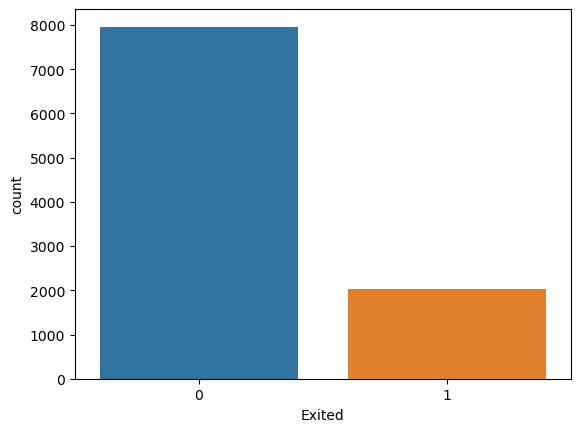

In [52]:
sns.countplot(x=y)

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2
                                        )

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
model= MLPClassifier(hidden_layer_sizes=(100,100,100), activation='relu', max_iter=100, random_state=0)

In [19]:
model.fit(x_train,y_train)

C:\Users\Swayam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [20]:
y_pred= model.predict(x_test)

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score;


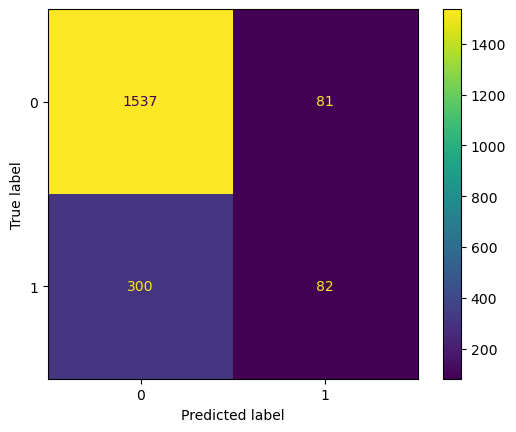

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [23]:
accuracy_score(y_test,y_pred)

0.8095

In [25]:
!pip install imbalanced-learn

     -------------------------------------- 235.6/235.6 kB 4.8 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
rr= RandomOverSampler()

In [29]:
x_res, y_res =rr.fit_resample(x,y)

<AxesSubplot:xlabel='Exited', ylabel='count'>

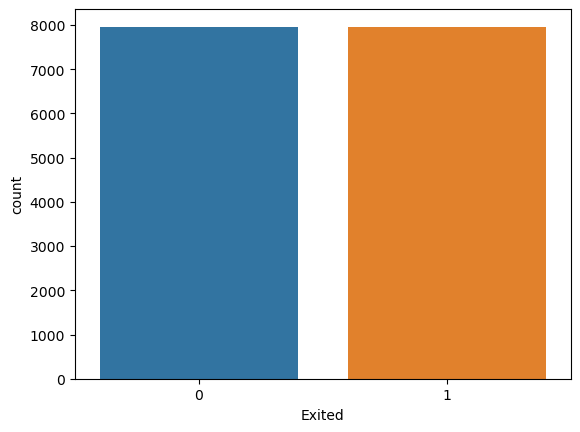

In [31]:
sns.countplot(x=y_res)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test= train_test_split(x_res,y_res,test_size=0.2)

In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
model= MLPClassifier(hidden_layer_sizes=(100,100,100),activation='relu',max_iter=100,random_state=0)

In [37]:
model.fit(x_train,y_train)

C:\Users\Swayam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

y_predict= model.predict(x_test)

In [39]:
y_predict= model.predict(x_test)

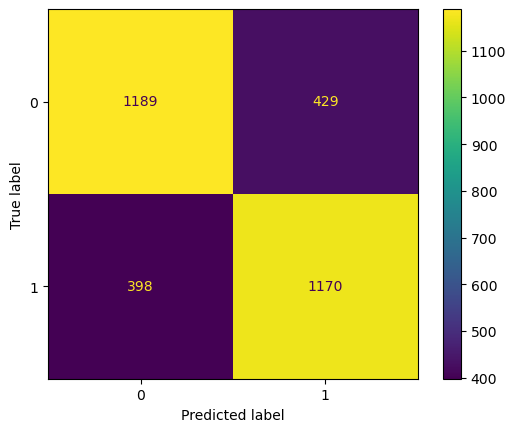

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [42]:
from sklearn.metrics import classification_report;


In [46]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.75      0.73      0.74      1618\n           1       0.73      0.75      0.74      1568\n\n    accuracy                           0.74      3186\n   macro avg       0.74      0.74      0.74      3186\nweighted avg       0.74      0.74      0.74      3186\n'

In [47]:
report= classification_report(y_test,y_predict)

In [49]:
print(report)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1618
           1       0.73      0.75      0.74      1568

    accuracy                           0.74      3186
   macro avg       0.74      0.74      0.74      3186
weighted avg       0.74      0.74      0.74      3186

